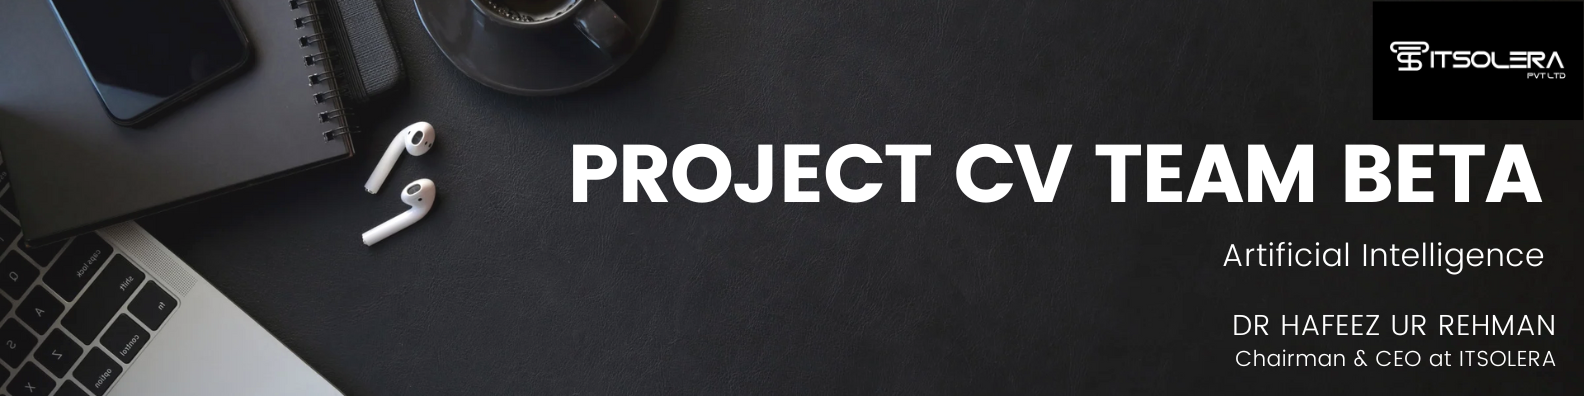

# Handwritten Digit Recognition

# Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1 Dataset Collection

• MNIST Dataset: Utilize the MNIST dataset, a widely-used benchmark dataset for
handwritten digit recognition, which contains 60,000 training images and 10,000 testing
images of handwritten digits.

In [ ]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the shapes of the dataset
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}')

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


# 2 Data Preprocessing

• Normalization: Normalize the pixel values to fall within a specific range (e.g., 0 to 1).
• Noise Reduction: Apply techniques such as Gaussian blur or median filtering to reduce
noise in the images.
• Data Augmentation: Perform data augmentation techniques such as rotation, scaling,
and translation to increase the diversity of the training data.

In [ ]:
# Normalize the pixel values to the range 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to add a channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# 3 Feature Extraction

• Pixel Intensity: Use raw pixel intensity values as features.
• Histogram of Oriented Gradients (HOG): Extract HOG features to capture edge
information.
• Principal Component Analysis (PCA): Reduce the dimensionality of the data while
preserving important information.

# 4 Model Selection
• Traditional Models: Implement k-NN, SVM, and Random Forest classifiers.
• Deep Learning Models: Develop and train CNNs, experimenting with different
architectures and hyperparameters.

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


# 5 Training and Evaluation
• Training: Split the dataset into training, validation, and test sets. Train the models using
the training set and tune hyperparameters using the validation set.
• Evaluation Metrics: Evaluate the models using accuracy, precision, recall, and F1 score.
Perform cross-validation to ensure robustness.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/10
375/375 [==============================] - 43s 111ms/step - loss: 0.2631 - accuracy: 0.9216 - val_loss: 0.0918 - val_accuracy: 0.9737
Epoch 2/10
375/375 [==============================] - 40s 107ms/step - loss: 0.0722 - accuracy: 0.9770 - val_loss: 0.0584 - val_accuracy: 0.9837
Epoch 3/10
375/375 [==============================] - 38s 102ms/step - loss: 0.0521 - accuracy: 0.9836 - val_loss: 0.0531 - val_accuracy: 0.9849
Epoch 4/10
375/375 [==============================] - 37s 99ms/step - loss: 0.0412 - accuracy: 0.9866 - val_loss: 0.0583 - val_accuracy: 0.9838
Epoch 5/10
375/375 [==============================] - 39s 103ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0496 - val_accuracy: 0.9856
Epoch 6/10
375/375 [==============================] - 40s 106ms/step - loss: 0.0269 - accuracy: 0.9911 - val_loss: 0.0464 - val_accuracy: 0.9872
Epoch 7/10
375/375 [==============================] - 39s 103ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0446 - val_acc

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 3s 9ms/step - loss: 0.0329 - accuracy: 0.9896
Test accuracy: 0.9896000027656555


# Predictions

6 Choose best Accuracy Model for Predictions

313/313 [==============================] - 4s 11ms/step


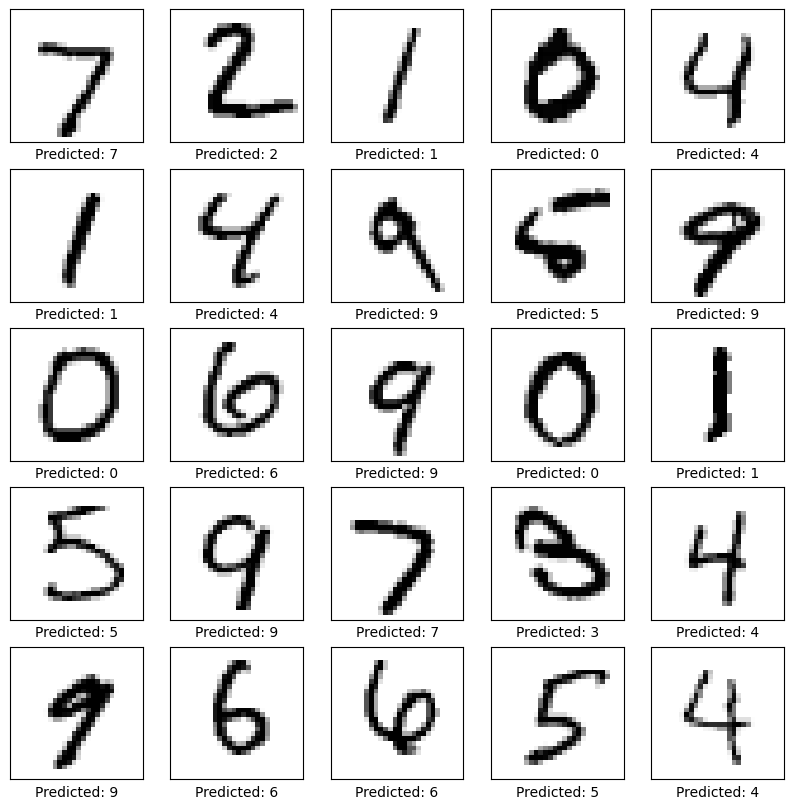

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Plot some results
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {predictions[i].argmax()}')
plt.show()


In [ ]:
import numpy as np
from PIL import Image

# Load your own image (example)
image_path = '/content/MNIST_digit.png'
img = Image.open(image_path).convert('L')  # Convert to grayscale
img = img.resize((28, 28))  # Resize to 28x28 pixels

# Convert image to numpy array and normalize
img_array = np.array(img)
img_array = img_array.astype('float32') / 255.0

# Reshape the image to fit the model input shape (add a batch dimension)
img_array = img_array.reshape((1, 28, 28, 1))

# Make prediction
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)

print(f'Predicted digit: {predicted_digit}')


1/1 [==============================] - 0s 25ms/step
Predicted digit: 3
